In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from mlflow.sklearn import load_model
from DataScienceTracker.ModelTracking import ModelTracking

In [7]:
#MLFLOW Settings
hostname = "localhost"
port = 5000
experiment_name = "predictive_maintenance_demo"

modelTracking = ModelTracking(hostname, port, experiment_name)
modelTracking.init_mlflow()

## Dataset Generation
- Source : Aircraft Maintenance Dataset From Kaggle
- First_generation : Delete useless columns
- Second_generation : Labelised columns names
- Third generation : Add new column --> Last cycle reached by an Aircraft
- Fourth generation : Labelised data as out if last cycle reached by an Aircraft otherwise in
- Five generation : Drop useless cycle field
- Six generation : Drop useless fields based on std, max and min

In [8]:
df_source = pd.read_csv('/home/pierre/datas/aircraft_maintenance/PM_train.txt', sep=' ', header=None)
df_source.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [9]:
drop_col = range(0, 26)
df_first_gen = df_source.iloc[:, drop_col]
df_first_gen.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20', 's21']
df_second_gen = df_first_gen.copy()
df_second_gen.columns = col_names
df_second_gen.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## Number of Aircaft

In [11]:
df_second_gen['id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

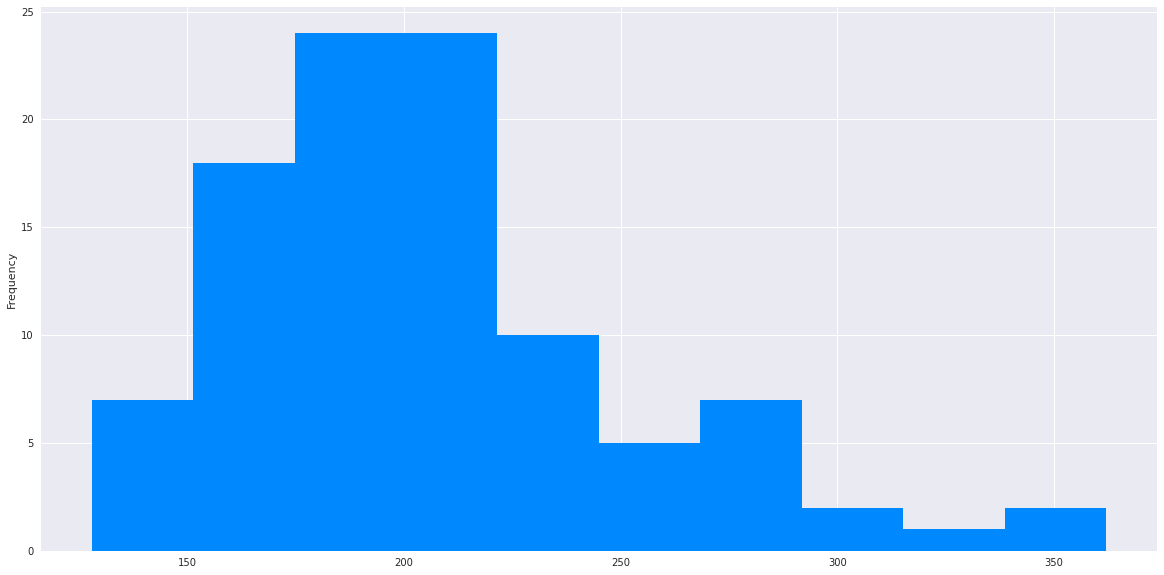

In [12]:
last_cycle_per_aircraft = df_second_gen.groupby(['id']).max()['cycle']
with  plt.style.context(['seaborn']):
    plt.figure(figsize=(20, 10))
    last_cycle_per_aircraft.plot.hist(color=('#0088ff'))
    plt.grid(True)
plt.show()

In [13]:
df_third_gen = pd.merge(df_second_gen.set_index(['id']), last_cycle_per_aircraft, left_index=True, right_index=True)
df_third_gen = df_third_gen.reset_index()
df_third_gen.head()

,id,cycle_x,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_y
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192


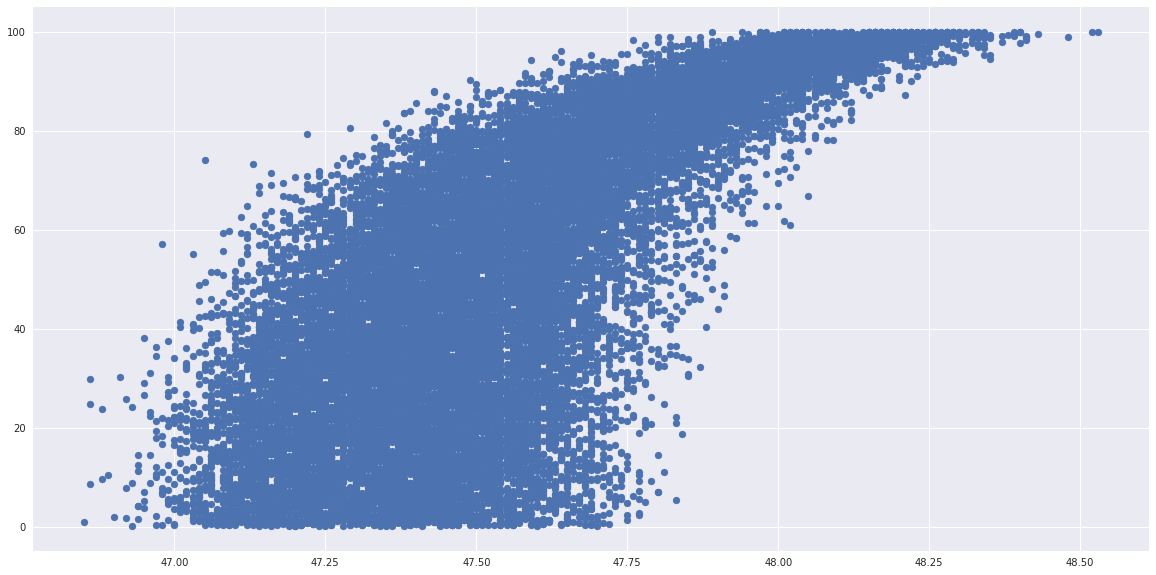

In [14]:
df_fourth_gen = df_third_gen.copy()
df_fourth_gen['life_percent'] = (df_fourth_gen['cycle_x'] / df_fourth_gen['cycle_y'])*100

with  plt.style.context(['seaborn']):
    plt.figure(figsize=(20, 10))
    plt.scatter(df_fourth_gen['s11'], df_fourth_gen['life_percent'])
    plt.grid(True)
plt.show()

In [15]:
df_five_gen= df_fourth_gen.drop(columns=['cycle_y'])
df_five_gen.head()

,id,cycle_x,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,life_percent
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.520833
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,1.041667
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,1.562500
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,2.083333
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,2.604167


In [16]:
df_five_gen_stats = df_five_gen.describe().loc[['std', 'min', 'max'],:]
df_five_gen_stats
useless_labels = []
for column in df_five_gen_stats.columns:
    current_serie = df_five_gen_stats.loc[:, column]
    if(current_serie['std'] == 0 and current_serie['max'] == current_serie['min']):
        useless_labels.append(column)
    
df_six_gen = df_five_gen.drop(columns=useless_labels)
df_six_gen.head()

,id,cycle_x,setting1,setting2,s2,s3,s4,s5,s6,s7,...,s11,s12,s13,s14,s15,s16,s17,s20,s21,life_percent
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,14.62,21.61,554.36,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190,0.520833
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,14.62,21.61,553.75,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236,1.041667
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,14.62,21.61,554.26,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442,1.562500
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,14.62,21.61,554.45,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739,2.083333
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,14.62,21.61,554.00,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044,2.604167


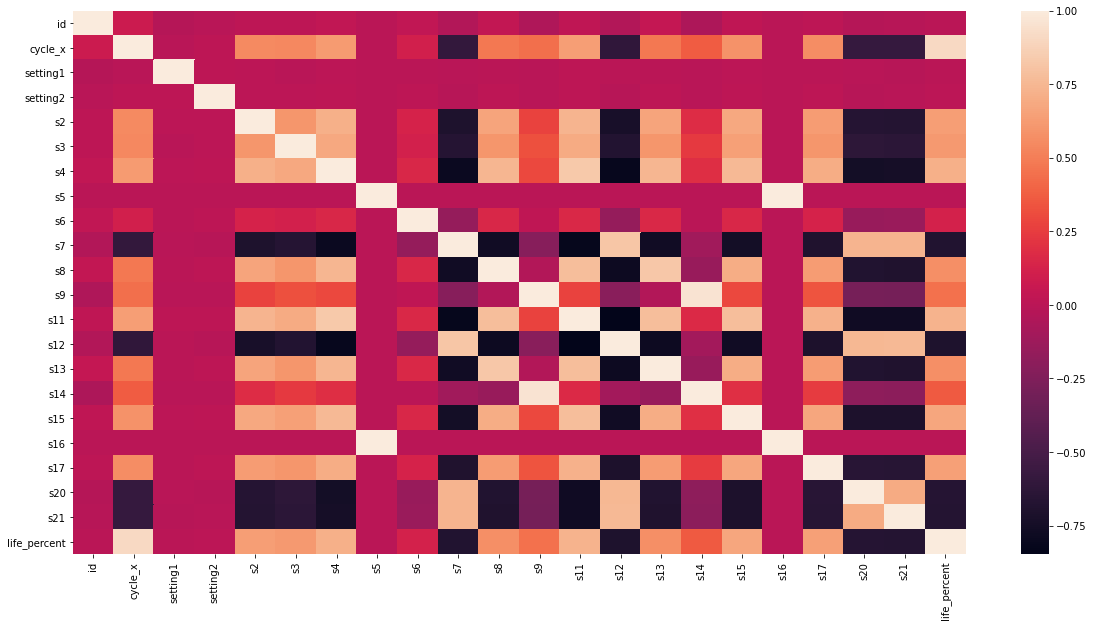

In [17]:
plt.figure(figsize=(20, 10))
sb.heatmap(df_six_gen.corr())
plt.show()

In [18]:
labels = df_six_gen.columns
df_seven_gen = pd.DataFrame()

for label in labels:
    max_value = df_six_gen.loc[:, label].max()
    min_value = df_six_gen.loc[:, label].min()
    
    df_seven_gen[label] = df_six_gen.loc[:, label].apply(lambda x : (x-min_value)/(max_value-min_value))
df_seven_gen.describe()

,id,cycle_x,setting1,setting2,s2,s3,s4,s5,s6,s7,...,s11,s12,s13,s14,s15,s16,s17,s20,s21,life_percent
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,0.0,20631.000000,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,0.0,20631.000000,20631.000000,20631.000000,20631.000000
mean,0.510167,0.298637,0.499490,0.501959,0.443052,0.424746,0.450435,NaN,0.980321,0.566459,...,0.411410,0.580697,0.317871,0.226095,0.451118,NaN,0.434221,0.524241,0.546127,0.501045
std,0.295229,0.190806,0.125708,0.244218,0.150618,0.133664,0.151935,NaN,0.138898,0.142527,...,0.158981,0.157261,0.105763,0.098442,0.144306,NaN,0.129064,0.140114,0.149476,0.289479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.252525,0.141274,0.413793,0.333333,0.335843,0.331807,0.339467,NaN,1.000000,0.476651,...,0.297619,0.484009,0.235294,0.171870,0.346287,NaN,0.333333,0.434109,0.452361,0.250405
50%,0.515152,0.285319,0.500000,0.500000,0.430723,0.415522,0.435348,NaN,1.000000,0.578100,...,0.392857,0.594883,0.308824,0.209516,0.438630,NaN,0.416667,0.534884,0.557443,0.501109
75%,0.767677,0.429363,0.586207,0.750000,0.539157,0.508829,0.545324,NaN,1.000000,0.669887,...,0.505952,0.695096,0.382353,0.249613,0.541362,NaN,0.500000,0.627907,0.652582,0.751866
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000


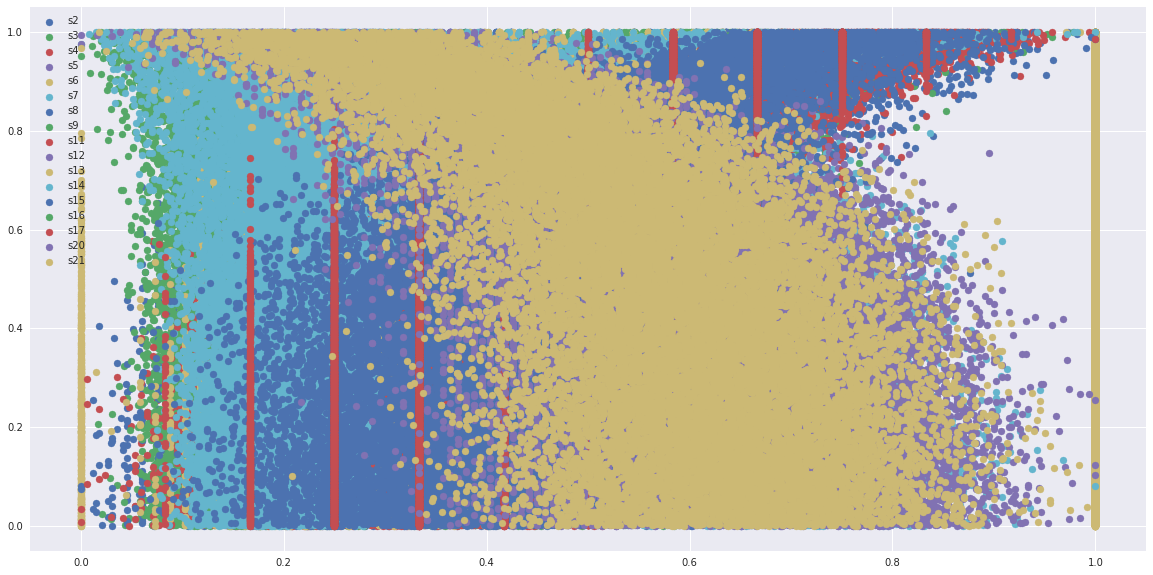

In [19]:
sensor_labels = ["s{indice}".format(indice=i) for i in range(2, 22)]

with  plt.style.context(['seaborn']):
    plt.figure(figsize=(20, 10))
    for sensor in sensor_labels:
        if sensor in useless_labels :
            continue
        plt.scatter(df_seven_gen[sensor], df_seven_gen['life_percent'], label=sensor)
    plt.grid(True)
    plt.legend()
plt.show()

In [20]:
df_height_gen = df_seven_gen.copy()
df_height_gen = df_height_gen.loc[:, ['s11', 'id', 'life_percent']]

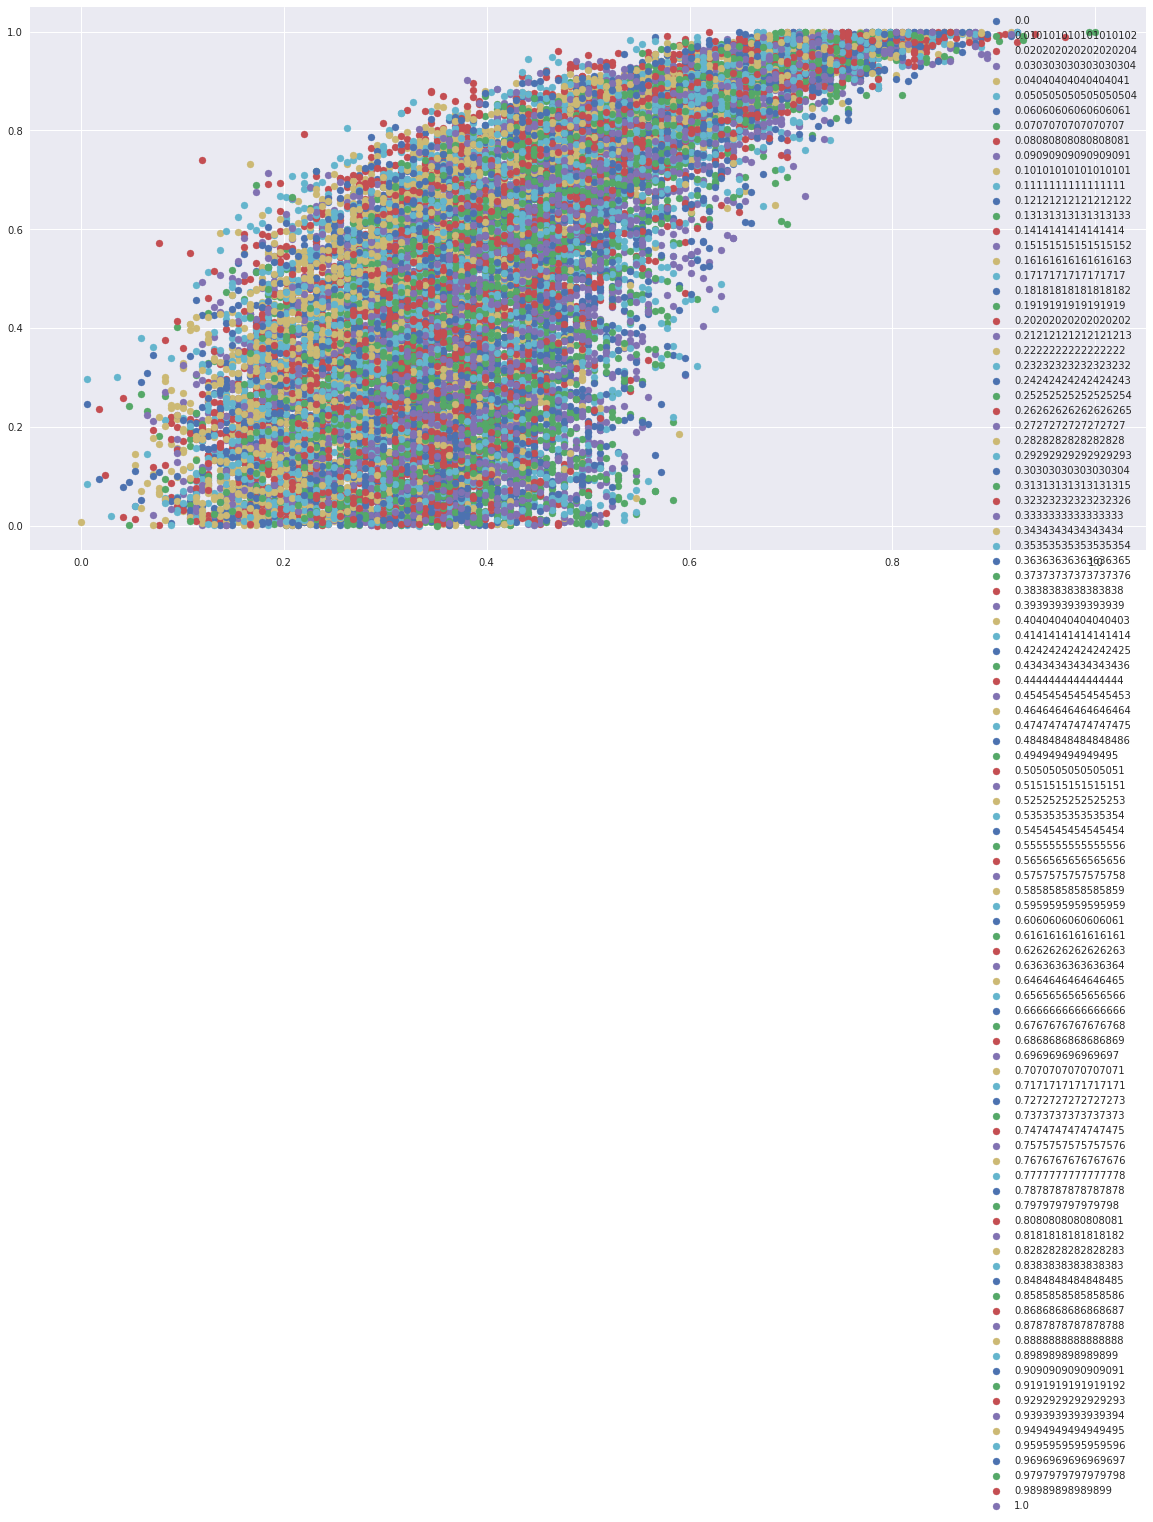

In [21]:
with  plt.style.context(['seaborn']):
    plt.figure(figsize=(20, 10))
    for identi in df_height_gen['id'].unique():
        current_df = df_height_gen.loc[df_height_gen['id'] == identi]
        plt.scatter(current_df['s11'], current_df['life_percent'], label=identi)
        plt.grid(True)
        plt.legend()
plt.show()

In [22]:
df_height_gen.columns = ['sensor', 'id', "life_percent"]
df_height_gen = df_height_gen.drop(columns=['id'])
df_height_gen.head()

,sensor,life_percent
0,0.369048,0.002453
1,0.380952,0.007675
2,0.250000,0.012898
3,0.166667,0.018121
4,0.255952,0.023344


In [23]:
train, test = train_test_split(df_height_gen, test_size=0.33)
print(train.shape)
print(test.shape)

x_train = train.iloc[:, :-1]
x_test = test.iloc[:, :-1]
y_train = train.iloc[:, -1:].values.ravel()
y_test = test.iloc[:, -1:]

(13822, 2)
(6809, 2)


In [24]:
x_test.shape

(6809, 1)

In [25]:
models = []

model_name = 'RandomForestRegressorPipeline'
pipe = Pipeline([
    ('RandomForestRegressor', RandomForestRegressor())
])
parameters = [
    {
      'RandomForestRegressor__n_estimators' : range(100, 102)
    }
]

metrics_obj = [mean_absolute_error]
metrics_name = ["MAE"]
metrics_evaluation = list(zip(metrics_obj, metrics_name))
models.append(modelTracking.render_model_conf(model_name, pipe, parameters, metrics_evaluation))

In [26]:
##With Cross Validation
train_test_meta = {}
train_test_meta["train"] = {}
train_test_meta["test"] = {}
train_test_meta["train"]["tag"] = "train_tag"
train_test_meta["test"]["tag"] = "test_tag"
train_test_meta["train"]["path"] = "train_path"
train_test_meta["test"]["path"] = "test_path"
modelTracking.apply_models_with_cv(models, x_train, y_train, x_test, y_test, train_test_meta, "Supervised_Regression_Experiment")

The current notebook, which produced the result of this training, has not been tracked. If you want to track it, use the parameters, notebook, path, notebook_name and notebook_version


In [27]:
regression_best_model = load_model("/home/pierre/pp/pp-punch/packagings/punch-standalone/target/punch-standalone-6.2.0-SNAPSHOT-linux/external/punch-mlflow-app-6.2.0-SNAPSHOT/logs/artifacts/0/000ff617c6b54f8e825101e7e24b06a3/artifacts/RandomForestRegressorPipeline")

In [28]:
test_features = np.linspace(0.0, 1.0, 1000)
test_features = test_features.reshape((1000, 1))
results = regression_best_model.predict(test_features)

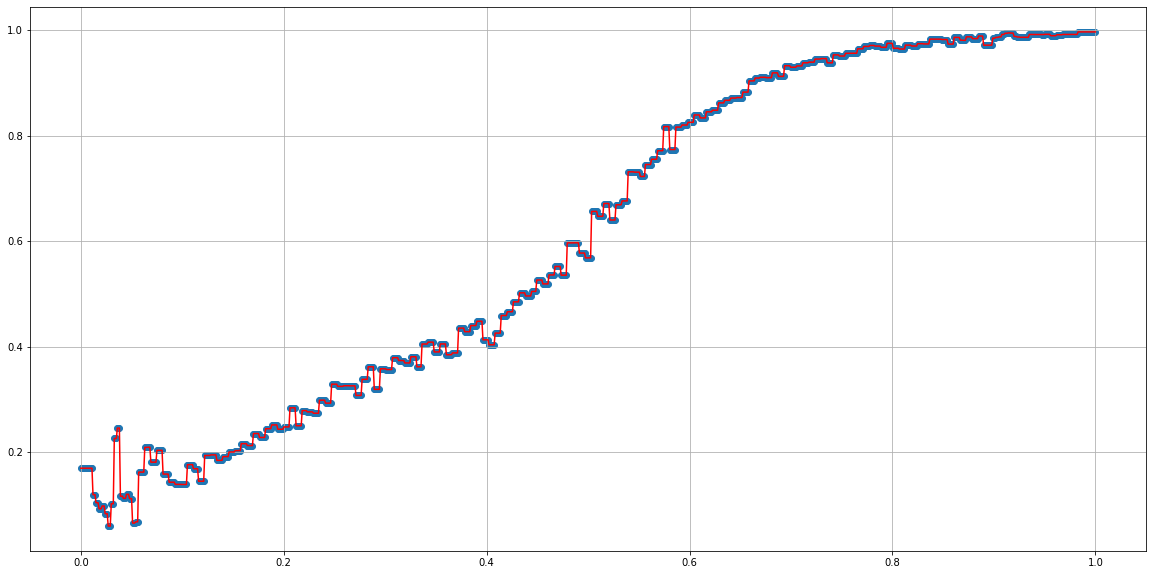

In [29]:
plt.figure(figsize=(20, 10))
plt.scatter(test_features, results)
plt.plot(test_features, results, color='red')
plt.grid(True)
plt.show()